#Data Histori Iklim di Sumatera

Data Preparation

In [ ]:
# Mengimport module dan library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
# Menampilkan dataset untuk 5 baris teratas

data_iklim = pd.read_excel("/content/Data histori iklim Sumatra.xlsx")
print("Menampilkan dataset iklim untuk 5 baris teratas")
data_iklim.head()

Menampilkan dataset iklim untuk 5 baris teratas


,Unnamed: 0,curah hujan,suhu rata2,suhu maksimum,kecepatan angin,kelembaban
0,1998-01-01,0.006993,26.596037,29.768399,2.812784,83.517538
1,1998-02-01,0.007415,27.090800,30.439925,2.769780,82.232859
2,1998-03-01,0.007114,27.373925,30.796238,2.446538,81.575322
3,1998-04-01,0.006957,27.714651,31.142920,2.371167,82.099320
4,1998-05-01,0.007574,27.987911,31.436470,2.569279,82.311830


In [ ]:
# Tipe dataset

data_iklim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       288 non-null    datetime64[ns]
 1   curah hujan      288 non-null    float64       
 2   suhu rata2       288 non-null    float64       
 3   suhu maksimum    288 non-null    float64       
 4   kecepatan angin  288 non-null    float64       
 5   kelembaban       288 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.6 KB


In [ ]:
# Mengubah kolom Unnamed: 0 menjadi indeks datetime

data_iklim['Unnamed: 0'] = pd.to_datetime(data_iklim['Unnamed: 0'])
data_iklim.set_index('Unnamed: 0', inplace=True)

In [ ]:
# Melihat informasi statistik deskriptif dari dataset iklim

data_iklim.describe()

,curah hujan,suhu rata2,suhu maksimum,kecepatan angin,kelembaban
count,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.007884,26.658723,29.893280,3.107173,82.048381
std,0.002441,0.465666,0.485840,0.481182,1.411688
min,0.003234,25.669423,28.715280,2.090809,78.823321
25%,0.005997,26.295504,29.571115,2.753864,81.027356
50%,0.007556,26.628692,29.838047,3.094197,81.981775
75%,0.009301,26.964252,30.246978,3.458760,83.084410
max,0.014686,27.987911,31.436470,4.559782,85.464336


In [ ]:
data_iklim.head()

,curah hujan,suhu rata2,suhu maksimum,kecepatan angin,kelembaban
Unnamed: 0,,,,,
1998-01-01,0.006993,26.596037,29.768399,2.812784,83.517538
1998-02-01,0.007415,27.090800,30.439925,2.769780,82.232859
1998-03-01,0.007114,27.373925,30.796238,2.446538,81.575322
1998-04-01,0.006957,27.714651,31.142920,2.371167,82.099320
1998-05-01,0.007574,27.987911,31.436470,2.569279,82.311830


In [ ]:
data_iklim.tail()

,curah hujan,suhu rata2,suhu maksimum,kecepatan angin,kelembaban
Unnamed: 0,,,,,
2021-08-01,0.010290,26.609571,30.067860,3.165688,81.979986
2021-09-01,0.008798,26.786731,30.005926,3.250631,81.120836
2021-10-01,0.007679,27.038812,30.484767,2.830281,80.521732
2021-11-01,0.010859,26.714781,30.006431,3.096336,82.060472
2021-12-01,0.010319,26.521577,29.752494,3.580289,83.220978


# Visualisasi Dataset

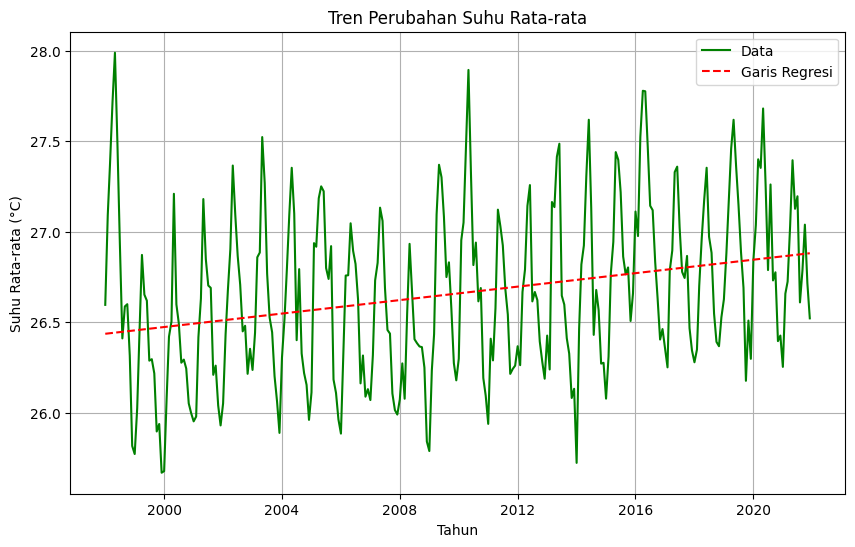

Indikator utama perubahan cuaca


In [ ]:
#@title Suhu Rata-rata

# Membuat plot untuk menampilkan tren perubahan suhu rata-rata dari waktu ke waktu
plt.figure(figsize=(10, 6))
plt.plot(data_iklim.index, data_iklim['suhu rata2'], color='green', label='Data')

X = np.arange(len(data_iklim)).reshape(-1, 1)
y = data_iklim['suhu rata2'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
plt.plot(data_iklim.index, regressor.predict(X), color='red', linestyle='--', label='Garis Regresi')

plt.title('Tren Perubahan Suhu Rata-rata')
plt.xlabel('Tahun')
plt.ylabel('Suhu Rata-rata (°C)')
plt.grid(True)
plt.legend()
plt.show()

print("Indikator utama perubahan cuaca")

In [ ]:
# Mencari tanggal di mana suhu terendah terjadi beserta nilai suhunya
tanggal_suhu_terendah = data_iklim['suhu rata2'].idxmin()
suhu_terendah = data_iklim.loc[tanggal_suhu_terendah, 'suhu rata2']

print("Suhu terendah pada hiistori iklim di Sumatera, terjadi pada tanggal:", tanggal_suhu_terendah)
print("Nilai suhu terendah:", suhu_terendah)

# Mencari tanggal di mana suhu tertinggi terjadi beserta nilai suhunya
tanggal_suhu_tertinggi = data_iklim['suhu rata2'].idxmax()
suhu_tertinggi = data_iklim.loc[tanggal_suhu_tertinggi, 'suhu rata2']

print("Suhu tertinggi terjadi pada tanggal:", tanggal_suhu_tertinggi)
print("Nilai suhu tertinggi:", suhu_tertinggi)

Suhu terendah pada hiistori iklim di Sumatera, terjadi pada tanggal: 1999-12-01 00:00:00
Nilai suhu terendah: 25.6694233975686
Suhu tertinggi terjadi pada tanggal: 1998-05-01 00:00:00
Nilai suhu tertinggi: 27.98791079655713


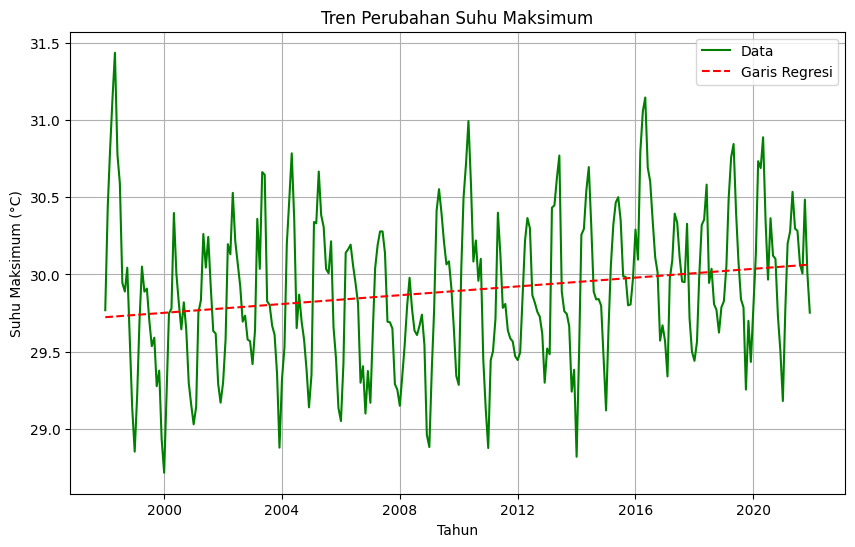

In [ ]:
#@title Suhu Maksimum

# Membuat plot untuk menampilkan tren perubahan suhu maksimum dari waktu ke waktu
plt.figure(figsize=(10, 6))
plt.plot(data_iklim.index, data_iklim['suhu maksimum'], color='green', label='Data')

X = np.arange(len(data_iklim)).reshape(-1, 1)
y = data_iklim['suhu maksimum'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
plt.plot(data_iklim.index, regressor.predict(X), color='red', linestyle='--', label='Garis Regresi')

plt.title('Tren Perubahan Suhu Maksimum')
plt.xlabel('Tahun')
plt.ylabel('Suhu Maksimum (°C)')
plt.grid(True)
plt.legend()
plt.show()

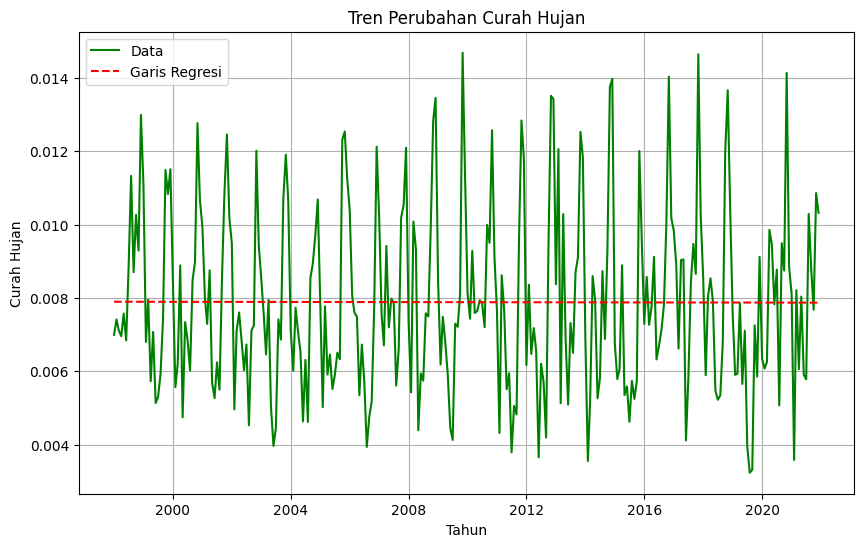

In [ ]:
#@title Curah Hujan

# Membuat plot untuk menampilkan tren perubahan curah hujan dari waktu ke waktu
plt.figure(figsize=(10, 6))
plt.plot(data_iklim.index, data_iklim['curah hujan'], color='green', label='Data')

X = np.arange(len(data_iklim)).reshape(-1, 1)
y = data_iklim['curah hujan'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
plt.plot(data_iklim.index, regressor.predict(X), color='red', linestyle='--', label='Garis Regresi')

plt.title('Tren Perubahan Curah Hujan')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Mencari tanggal di mana hujan terendah terjadi beserta nilai hujan
tanggal_hujan_terendah = data_iklim['curah hujan'].idxmin()
hujan_terendah = data_iklim.loc[tanggal_hujan_terendah, 'curah hujan']

print("Hujan terendah pada hiistori iklim di Sumatera, terjadi pada tanggal:", tanggal_hujan_terendah)
print("Nilai hujan terendah:", hujan_terendah)

# Mencari tanggal di mana hujan tertinggi terjadi beserta nilai hujan
tanggal_hujan_tertinggi = data_iklim['curah hujan'].idxmax()
hujan_tertinggi = data_iklim.loc[tanggal_hujan_tertinggi, 'curah hujan']

print("Hujan tertinggi terjadi pada tanggal:", tanggal_hujan_tertinggi)
print("Nilai hujan tertinggi:", hujan_tertinggi)


Hujan terendah pada hiistori iklim di Sumatera, terjadi pada tanggal: 2019-08-01 00:00:00
Nilai hujan terendah: 0.003233576479932059
Hujan tertinggi terjadi pada tanggal: 2009-11-01 00:00:00
Nilai hujan tertinggi: 0.01468604145842614


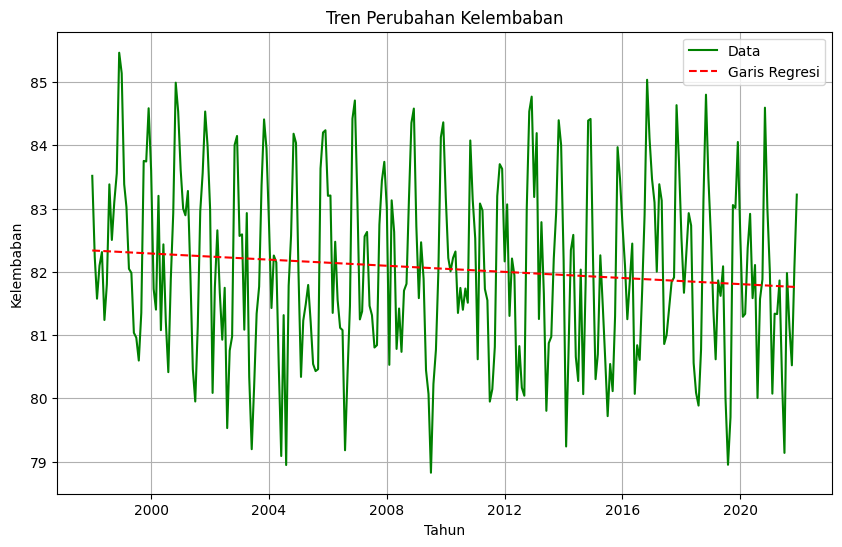

In [ ]:
#@title Kelembaban

# Membuat plot untuk menampilkan tren perubahan kelembaban dari waktu ke waktu
plt.figure(figsize=(10, 6))
plt.plot(data_iklim.index, data_iklim['kelembaban'], color='green', label='Data')

X = np.arange(len(data_iklim)).reshape(-1, 1)
y = data_iklim['kelembaban'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
plt.plot(data_iklim.index, regressor.predict(X), color='red', linestyle='--', label='Garis Regresi')

plt.title('Tren Perubahan Kelembaban')
plt.xlabel('Tahun')
plt.ylabel('Kelembaban')
plt.grid(True)
plt.legend()
plt.show()

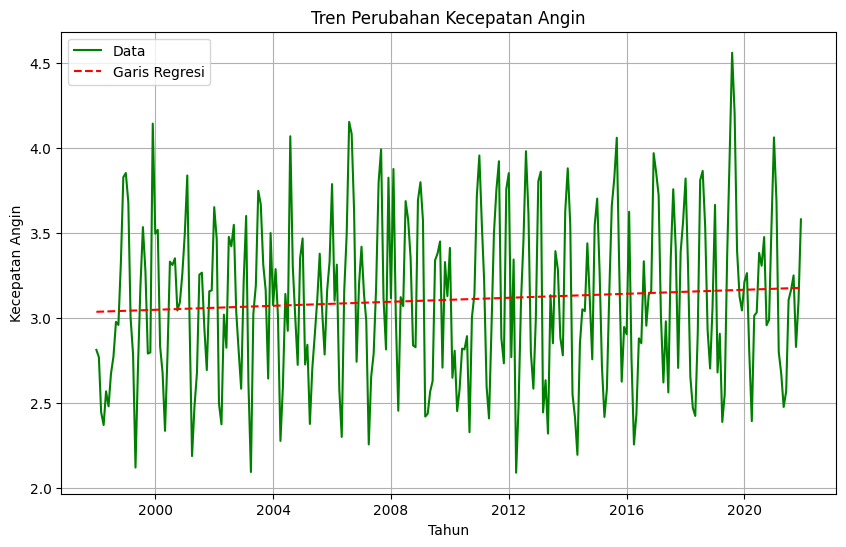

In [ ]:
#@title Kecepatan Angin

# Membuat plot untuk menampilkan tren perubahan kecepatan angin dari waktu ke waktu
plt.figure(figsize=(10, 6))
plt.plot(data_iklim.index, data_iklim['kecepatan angin'], color='green', label='Data')

X = np.arange(len(data_iklim)).reshape(-1, 1)
y = data_iklim['kecepatan angin'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
plt.plot(data_iklim.index, regressor.predict(X), color='red', linestyle='--', label='Garis Regresi')

plt.title('Tren Perubahan Kecepatan Angin')
plt.xlabel('Tahun')
plt.ylabel('Kecepatan Angin')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Mencari tanggal di mana angin terendah terjadi beserta nilai angin
tanggal_angin_terendah = data_iklim['kecepatan angin'].idxmin()
angin_terendah = data_iklim.loc[tanggal_angin_terendah, 'kecepatan angin']

print("Angin terendah pada histori iklim di Sumatera, terjadi pada tanggal:", tanggal_angin_terendah)
print("Nilai angin terendah:", angin_terendah)

# Mencari tanggal di mana angin tertinggi terjadi beserta nilai angin
tanggal_angin_tertinggi = data_iklim['kecepatan angin'].idxmax()
angin_tertinggi = data_iklim.loc[tanggal_angin_tertinggi, 'kecepatan angin']

print("Angin tertinggi terjadi pada tanggal:", tanggal_angin_tertinggi)
print("Nilai angin tertinggi:", angin_tertinggi)


Angin terendah pada histori iklim di Sumatera, terjadi pada tanggal: 2012-04-01 00:00:00
Nilai angin terendah: 2.090809077039858
Angin tertinggi terjadi pada tanggal: 2019-08-01 00:00:00
Nilai angin tertinggi: 4.559782433700917


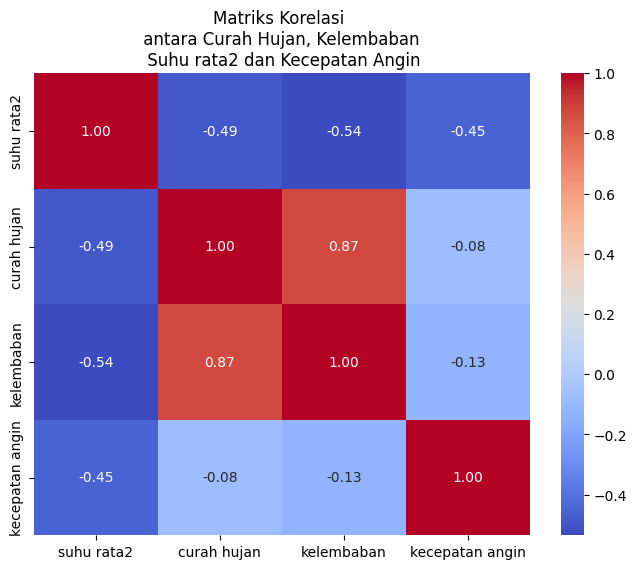

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = data_iklim[['suhu rata2','curah hujan', 'kelembaban', 'kecepatan angin']].corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi \n antara Curah Hujan, Kelembaban \n Suhu rata2 dan Kecepatan Angin')
plt.show()

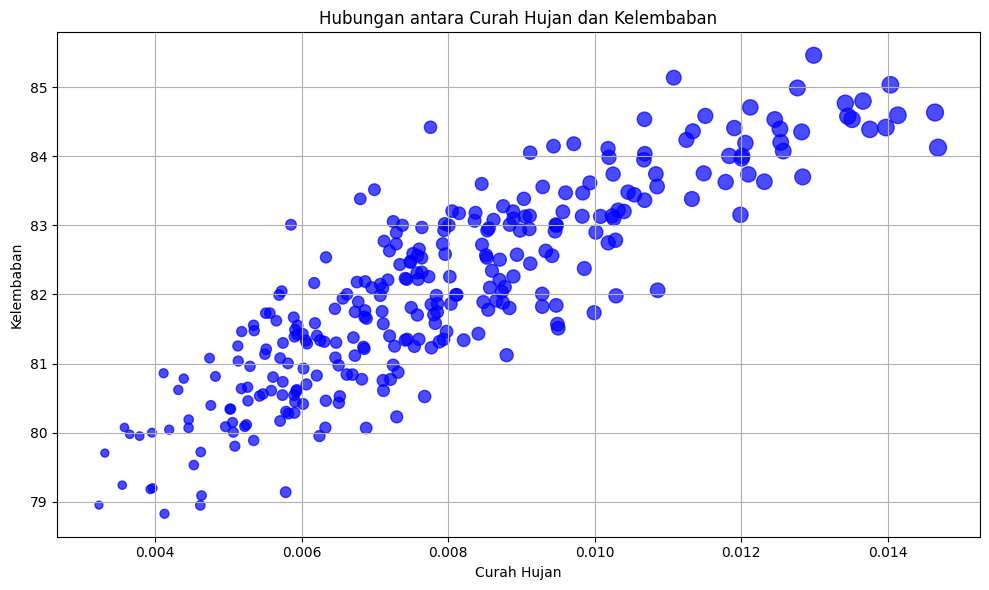

In [ ]:
# Tentukan ukuran bubble berdasarkan kolom tertentu (misalnya, curah hujan)
ukuran_bubble = data_iklim['curah hujan'] * 10000

plt.figure(figsize=(10, 6))
plt.scatter(data_iklim['curah hujan'], data_iklim['kelembaban'], s=ukuran_bubble, color='blue', alpha=0.7)
plt.title('Hubungan antara Curah Hujan dan Kelembaban')
plt.xlabel('Curah Hujan')
plt.ylabel('Kelembaban')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung korelasi Pearson antara curah hujan dan kelembapan
correlation = data_iklim['curah hujan'].corr(data_iklim['kelembaban'])

print("Korelasi Pearson antara curah hujan dan kelembaban:", correlation)


Korelasi Pearson antara curah hujan dan kelembaban: 0.8687952302390879


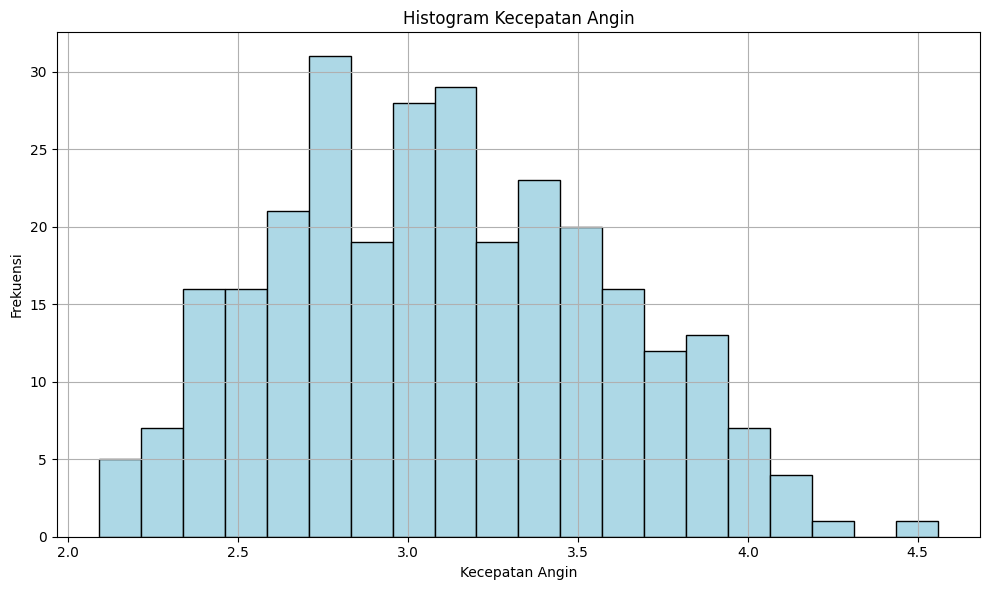

In [ ]:
# Grafik Garis: Tren perubahan suhu rata-rata dari waktu ke waktu
plt.figure(figsize=(10, 6))
plt.hist(data_iklim['kecepatan angin'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

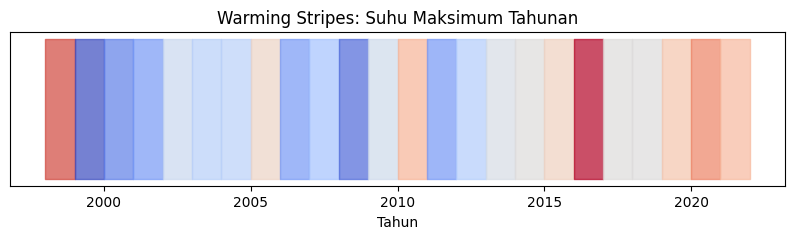

In [ ]:
# Menghitung rata-rata suhu tahunan
yearly_mean_temp = data_iklim['suhu maksimum'].resample('Y').mean()

# Normalisasi rata-rata suhu tahunan
norm_yearly_mean_temp = (yearly_mean_temp - yearly_mean_temp.min()) / (yearly_mean_temp.max() - yearly_mean_temp.min())

# Membuat grafik warming stripes
plt.figure(figsize=(10, 2))
for year, temp in zip(norm_yearly_mean_temp.index.year, norm_yearly_mean_temp):
    plt.fill_betweenx([0, 1], year, year + 1, color=plt.cm.coolwarm(temp), alpha=0.7)

plt.title('Warming Stripes: Suhu Maksimum Tahunan')
plt.xlabel('Tahun')
plt.yticks([])
plt.show()

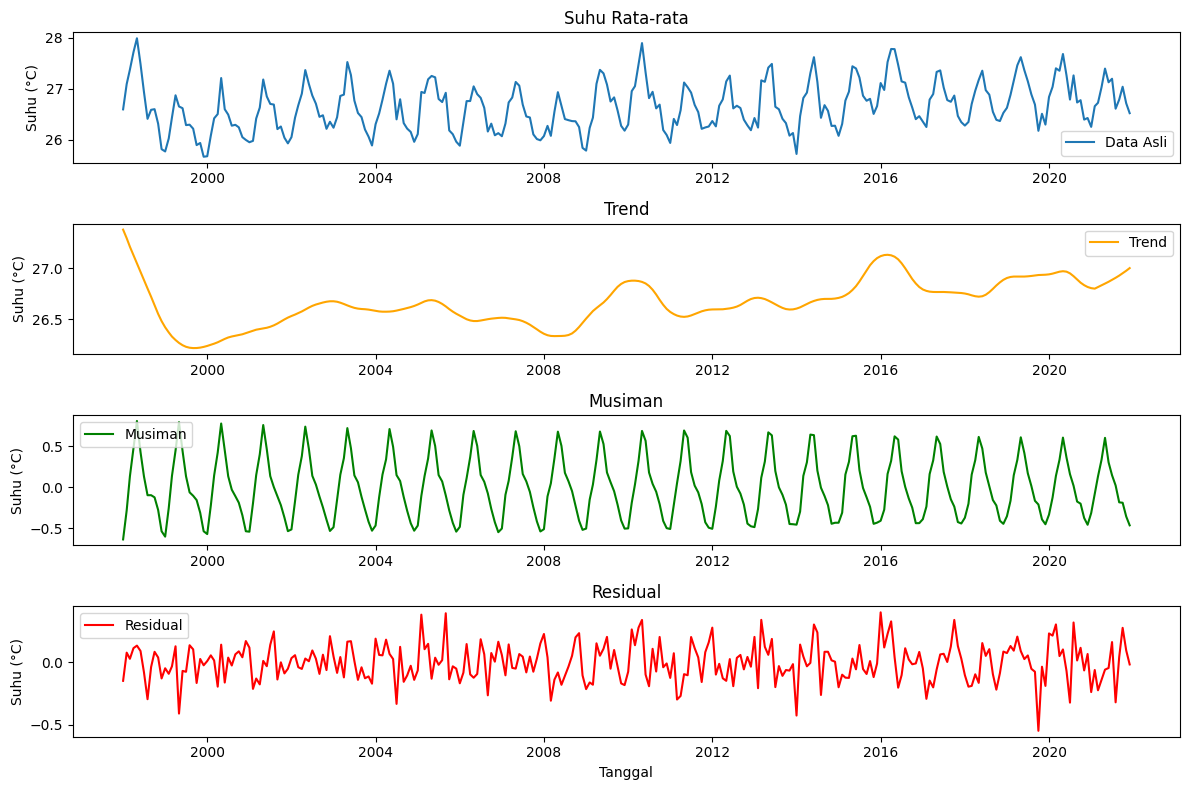

In [ ]:
from statsmodels.tsa.seasonal import STL

# Membuat model STL untuk dekomposisi
stl = STL(data_iklim['suhu rata2'], seasonal=13)
result = stl.fit()

# Visualisasi hasil dekomposisi
plt.figure(figsize=(12, 8))

# Data asli
plt.subplot(4, 1, 1)
plt.plot(data_iklim.index, data_iklim['suhu rata2'], label='Data Asli')
plt.title('Suhu Rata-rata')
plt.ylabel('Suhu (°C)')
plt.legend()

# Trend
plt.subplot(4, 1, 2)
plt.plot(data_iklim.index, result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.ylabel('Suhu (°C)')
plt.legend()

# Seasonal
plt.subplot(4, 1, 3)
plt.plot(data_iklim.index, result.seasonal, label='Musiman', color='green')
plt.title('Musiman')
plt.ylabel('Suhu (°C)')
plt.legend()

# Residual
plt.subplot(4, 1, 4)
plt.plot(data_iklim.index, result.resid, label='Residual', color='red')
plt.title('Residual')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.legend()

plt.tight_layout()
plt.show()

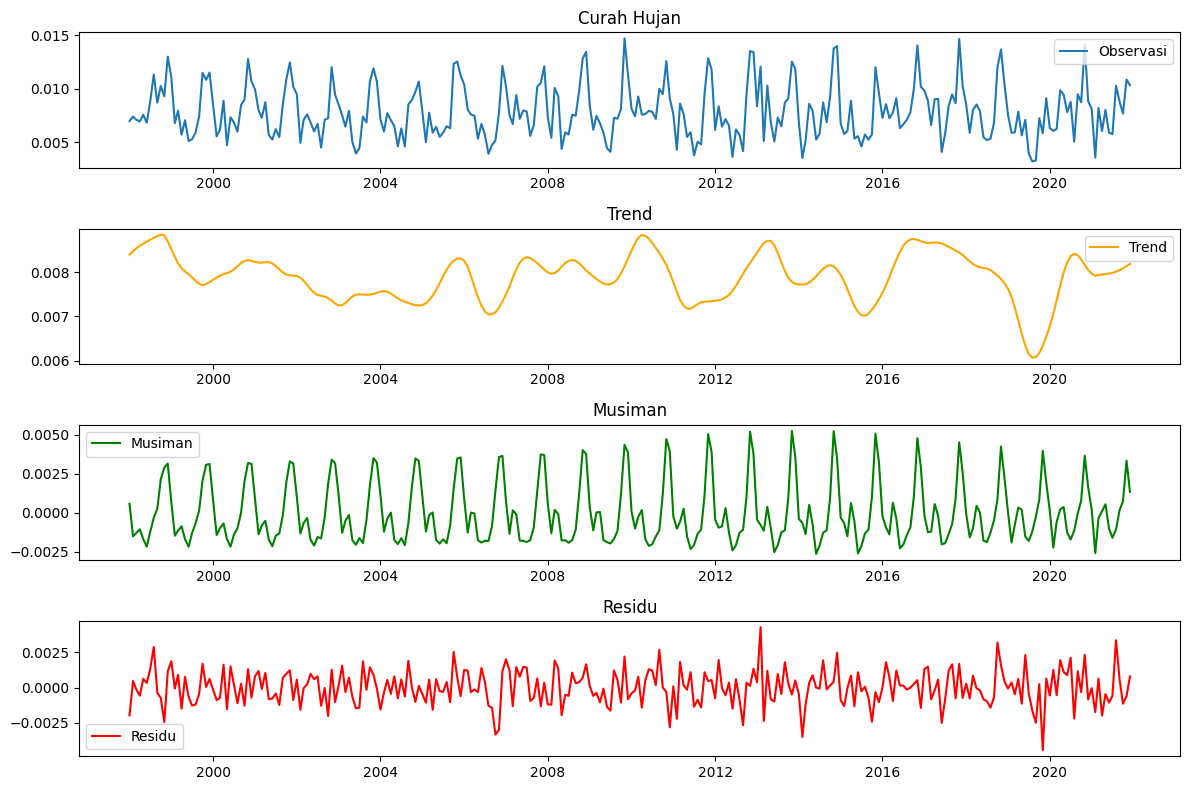

In [ ]:
# Mengambil data curah hujan
curah_hujan = data_iklim['curah hujan']

# Melakukan dekomposisi musiman menggunakan STL
stl = STL(curah_hujan, seasonal=13)
result = stl.fit()

# Menampilkan komponen musiman, trend, dan residu
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observasi')
plt.legend()
plt.title('Curah Hujan')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend()
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Musiman', color='green')
plt.legend()
plt.title('Musiman')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residu', color='red')
plt.legend()
plt.title('Residu')

plt.tight_layout()
plt.show()